# House Prices Prediction Model

## Goals
The goal is to predict the sales price for each house.

## Objective
The objective is to analyze sales price behavior based on several variables, determine what variables affect sales price the most, then build a model that can predict the House Prices.


# Data Exploration

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import warnings
warnings.filterwarnings("ignore")

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning from sklearn and seaborn

%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

## Load Dataset

In [2]:
df_train = pd.read_csv("train_houseprices.csv")
df_test = pd.read_csv("test_houseprices.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Description

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data type identification

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data numeric

In [7]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df_train.select_dtypes(include=numeric)
df_num.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


## Data categorical

In [8]:
df_cat=df_train.select_dtypes(include='object')
df_cat.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Analysis Dependent Variable

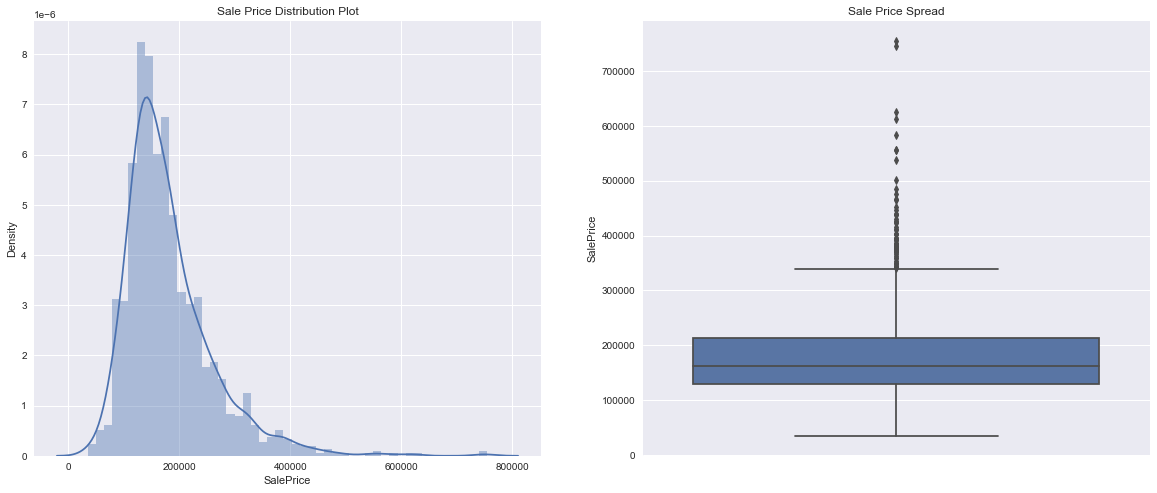

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(df_train.SalePrice)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df_train.SalePrice)

plt.show()

In [10]:
print(df_train.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skewness Co-efficient: 1.883


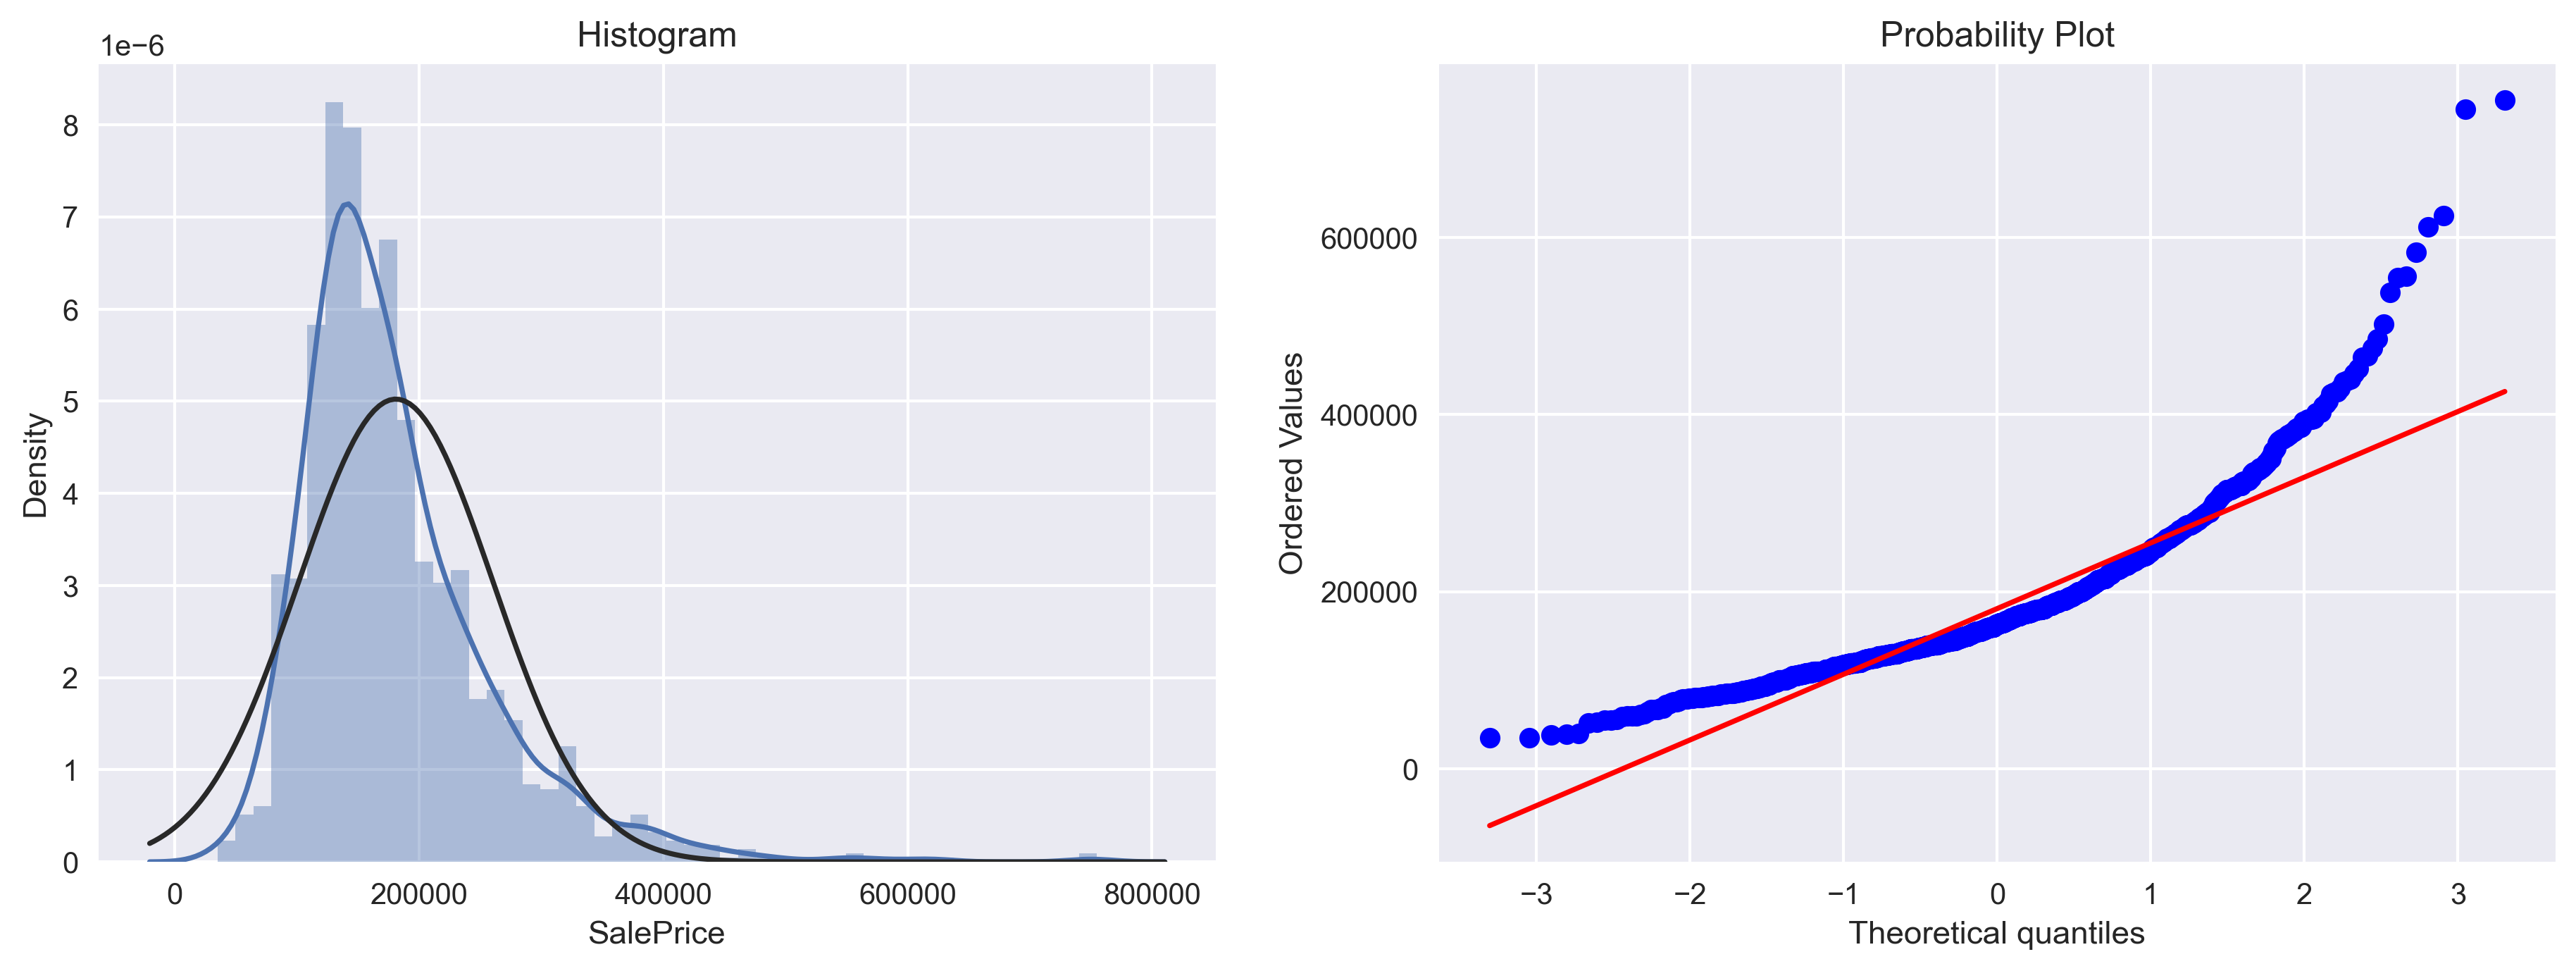

In [11]:
# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df_train.SalePrice.skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df_train['SalePrice'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df_train['SalePrice'], plot=ax2)

plt.show()

The next step is to analyze the column 'SalePrice', because the target variable is numeric then look at the histogram whether distributed normally or not. in the column, in the 'SalePrice' column, we can see a positive skewed because the tail of the distribution is to the right of the most value. That is, most distributions are in low value. So, the target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed. We will apply log transformation to the feature to make the distribution close to gaussian. We will apply log(1+x) transformation to avoid 0 values (if present)

Skewness Co-efficient: 0.121


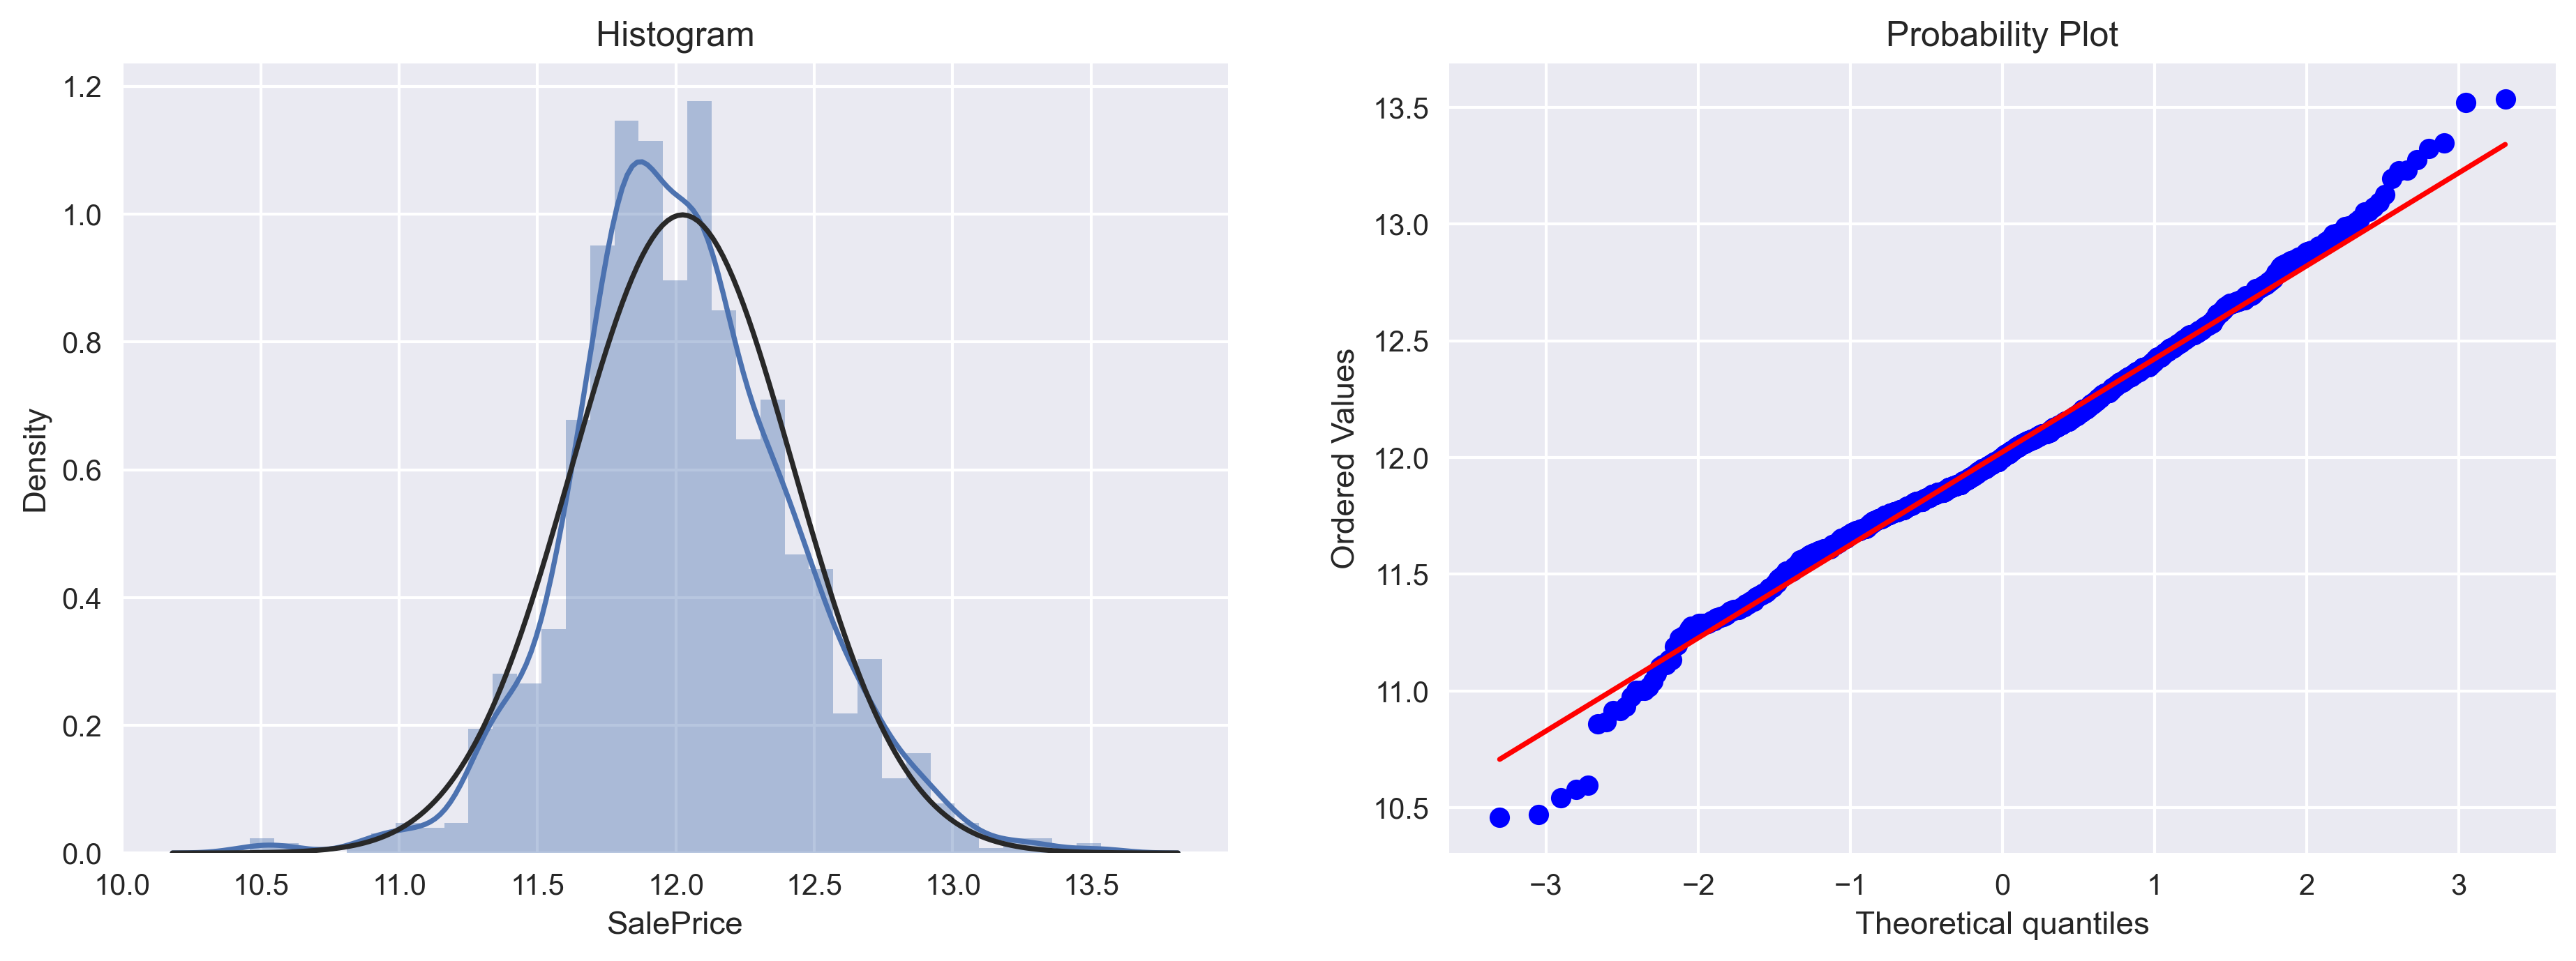

In [12]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df_train.SalePrice.skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df_train['SalePrice'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df_train['SalePrice'], plot=ax2)

plt.show()

After transformation the skewness has reduced from 1.883 to 0.121, and then the plot now looks close to the normal distribution and the probability plot can confirm the same.

# Early Features Engineering

## Combining Train and Test Dataframes

The purpose of combine the dataframe are to avoid repeating all the operations (such as transformations, imputations, etc) done on the train set for the test set and to get more data for our analysis (because more data we get, the BETTER it is)

##### Store the number of rows or indexes for train and test dataset to separate them while performing modeling and prediction.

In [13]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)

nindex, nfeatures = all_data.shape

In [14]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [15]:
all_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# Data Preparation

## Missing Value 

<AxesSubplot:>

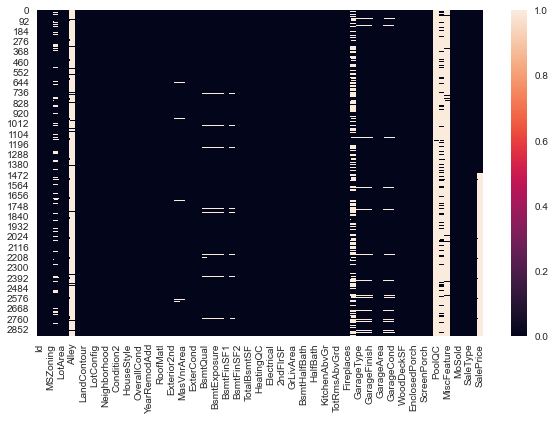

In [16]:
#show null values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(all_data.isnull())

In [17]:
null=pd.DataFrame(all_data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(all_data.isna().sum()/len(all_data)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
MSZoning,4,0.137033
LotFrontage,486,16.649538
Alley,2721,93.216855
Utilities,2,0.068517
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
MasVnrType,24,0.822199
MasVnrArea,23,0.787941
BsmtQual,81,2.774923
BsmtCond,82,2.809181


In [18]:
# Checking Missing Values Column 
all_data[["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]].head(4)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN


Analysis
1. PoolQC, MiscFeature, Alley, and Fence have more than 50% values. instead of to drop this features, we will take these features and leave it to our feature selection algorithm to provide important set of features.
2. We will perform Missing Value handling for each and every feature mentioned in the bar graph.
3. SalePrice will be ignored since the missing values belong to the test set. Out train set does not contain any missing values. 

###  Handling Missing Value PoolQC = Pool Quality

In [19]:
all_data.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

##### where : 
    - Ex =   Excellent
    - Gd =   Good
    - TA =   Average/Typical
    - Fa =   Fair
    - NA =   No Pool
 
NaN must be a blank field in the data corresponding to no PoolQC feature. so we will replacing NaN with a string value None

In [20]:
# Replacing NaN value with a string value 'None' and represented in an order ie ORDINAL Variable.
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

quality_map = {
    "None": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4
}

all_data['PoolQC'].replace(quality_map, inplace=True)
## remember this is just one call run if you run it like twice, its gonna show error warning hihi :)

### Handling Missing Value MiscFeature = Miscellaneous

In [21]:
all_data.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

##### where : 
    - Elev  =   Elevator
    - Gar2  =   2nd Garage
    - Othr  =   Other
    - Shed  =   Shed 
    - TenC  =   Tennis Court
    - NA    =   None
    
NaN must be a blank field in the data corresponding to no miscellaneous feature. so we will replacing NaN with a string value None

In [22]:
# replacing NaN value with a string value 'None' and represented in an order ie ORDINAL Variable.
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

### Handling Missing Value Alley = Type of alley access to property

In [23]:
all_data.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

##### where : 

    - Grvl  =   Gravel
    - Pave  =   Paved
    - NA    =   No alley access
    
NaN must be a blank field in the data corresponding to no alley acces. so we will replacing NaN with a string value None

In [24]:
## replacing NaN value with a string value 'None' and represented in an order ie ORDINAL Variable.
all_data['Alley'] = all_data['Alley'].fillna('None')

### Handling Missing Value Fence = Fence Quality

In [25]:
all_data.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

##### where : 

    - MnPrv =   Minimum Privacy
    - GdWo  =   Good Wood
    - MnWw  =   Minimum Wood/Wire
    - NA    =   No Fence
    
NaN must be a blank field in the data corresponding to no fence. so we will replacing NaN with a string value None

In [26]:
## replacing NaN value with a string value 'None' and represented in an order ie ORDINAL Variable.
all_data['Fence'] = all_data['Fence'].fillna('None')

### Handling Missing Value FireplaceQu = Fireplace quality

In [27]:
all_data.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

##### where : 
    - Ex     =   Excellent "Exceptional Masonry Fireplace"
    - Gd     =   Good "Masonry Fireplace in main level"
    - TA     =   Average "Prefabricated Fireplace in main living area or Masonry Fireplace in basement"
    - Fa     =   Fair "Prefabricated Fireplace in basement"
    - Po     =   Poor "Ben Franklin Stove"
    - NA     =   No Fireplace
    
NaN must be a blank field in the data corresponding to no fireplace. so we will replacing NaN with a string value None

In [28]:
# replacing NaN value with a string value 'None' and represented in an order ie ORDINAL Variable.
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

quality_map = {
    "None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}

all_data['FireplaceQu'].replace(quality_map, inplace=True)

### Handling Missing Value LotFrontage = Linear feet of street connected to property

In [29]:
all_data['LotFrontage'].dtype

dtype('float64')

> Since it is a numeric feature and the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, let us try to impute mean or median values by refering to the distribution of the feature values.

Skewness value: 1.50


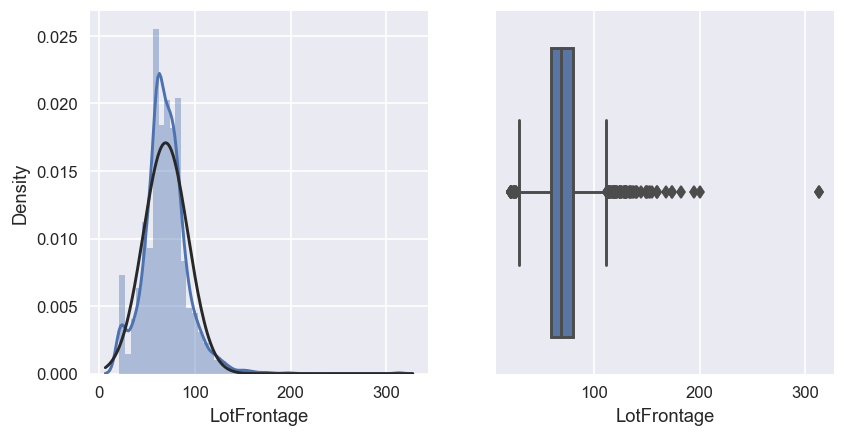

In [30]:
from scipy.stats import norm, skew

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=120)

sns.distplot(all_data['LotFrontage'].dropna(), fit=norm, ax=ax1)
sns.boxplot(all_data['LotFrontage'].dropna(), ax=ax2, orient='v')

print(f"Skewness value: %.2f" %all_data['LotFrontage'].dropna().skew())

> The skewness value is 1.50 and the boxplot denote that the distribution is highly positive skewed with high number of outliers (extreme values). so, we will make use of median imputation instead of mean imputation to avoid extreme values to have an impact.

In [31]:
#median imputation
all_data['LotFrontage'].fillna(value=all_data['LotFrontage'].median(), inplace=True)

### Handling Missing Value Garage

#### GarageType: Garage location

In [32]:
all_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

##### where :

    - 2Types     =   More than one type of garage
    - Attchd     =   Attached to home
    - Basment    =   Basement Garage
    - BuiltIn    =   Built-In (Garage part of house - typically has room above garage)
    - CarPort    =   Car Port
    - Detchd     =   Detached from home
    - NA         =   No Garage

#### GarageFinish: Interior finish of the garage

In [33]:
all_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

##### where : 
    - Fin       =   Finished
    - RFn       =   Rough Finished  
    - Unf       =   Unfinished
    - NA        =   No Garage

#### GarageQual: Garage quality

In [34]:
all_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

##### where : 
    - Ex     =   Excellent 
    - Gd     =   Good 
    - TA     =   Average
    - Fa     =   Fair 
    - Po     =   Poor
    - NA     =   No Garage

#### GarageCond: Garage condition

In [35]:
all_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

##### where : 
    - Ex     =   Excellent 
    - Gd     =   Good 
    - TA     =   Average
    - Fa     =   Fair 
    - Po     =   Poor
    - NA     =   No Garage

#### GarageYrBlt: Year garage was built

In [36]:
all_data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917.,
       1896., 1895., 2207., 1943., 1919.])

#### GarageCars: Size of garage in car capacity


In [37]:
all_data['GarageCars'].unique()

array([ 2.,  3.,  1.,  0.,  4.,  5., nan])

#### GarageArea: Size of garage in square feet

In [38]:
all_data['GarageArea'].unique()

array([ 548.,  460.,  608.,  642.,  836.,  480.,  636.,  484.,  468.,
        205.,  384.,  736.,  352.,  840.,  576.,  516.,  294.,  853.,
        280.,  534.,  572.,  270.,  890.,  772.,  319.,  240.,  250.,
        271.,  447.,  556.,  691.,  672.,  498.,  246.,    0.,  440.,
        308.,  504.,  300.,  670.,  826.,  386.,  388.,  528.,  894.,
        565.,  641.,  288.,  645.,  852.,  558.,  220.,  667.,  360.,
        427.,  490.,  379.,  297.,  283.,  509.,  405.,  758.,  461.,
        400.,  462.,  420.,  432.,  506.,  684.,  472.,  366.,  476.,
        410.,  740.,  648.,  273.,  546.,  325.,  792.,  450.,  180.,
        430.,  594.,  390.,  540.,  264.,  530.,  435.,  453.,  750.,
        487.,  624.,  471.,  318.,  766.,  660.,  470.,  720.,  577.,
        380.,  434.,  866.,  495.,  564.,  312.,  625.,  680.,  678.,
        726.,  532.,  216.,  303.,  789.,  511.,  616.,  521.,  451.,
       1166.,  252.,  497.,  682.,  666.,  786.,  795.,  856.,  473.,
        398.,  500.,

<b>The above code shows the unique values present the GarageType feature. Our assumption is that NaN values correspond to houses with no garages. Create a Garage Dataframe to further analyse the null values present.</b>

In [39]:
df_no_garage = all_data[[
    'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageCars', 'GarageArea'
]][
    all_data.isnull()
]

df_no_garage.head(5)

,GarageYrBlt,GarageCond,GarageFinish,GarageQual,GarageType,GarageCars,GarageArea
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(f"Total number of entries with Null Garage Type are {len(df_no_garage.index)}.")

Total number of entries with Null Garage Type are 2919.


In the above dataframe we can notice that when the feature GarageTpe is NaN, the corresponding categorical Garage features are also NaN and the numerical features are 0. This clearly indicates absence of garage for the house.
and the <b>total number entries with Null garage Type is 157...</b>

now we can safely impute the NaN values with string value of None for all the above features.

<b>NOTE: The additional two features GarageCars and GarageArea have a value of 0 for the corresponding NaN values.</b>

In [41]:
# Handling all Null in garage variable
for feature in ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']:
    all_data[feature].fillna(value='None', inplace=True)
    
for feature in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    all_data[feature].fillna(value=0, inplace=True)

### Handling Missing Value Basement

#### BsmtQual: Evaluates the height of the basement

In [42]:
all_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

##### where : 

   - Ex  = Excellent (100+ inches) 
   - Gd  = Good (90-99 inches)
   - TA  = Typical (80-89 inches)
   - Fa  = Fair (70-79 inches)
   - Po  = Poor (<70 inches
   - NA  = No Basement
   
The above code shows the unique values present the BsmtQual feature. Our assumption is that NaN values correspond to houses with no basement.

#### BsmtCond: Evaluates the general condition of the basement

In [43]:
all_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

##### where : 
   - Ex  = Excellent 
   - Gd  = Good 
   - TA  = Typical "slight dampness allowed"
   - Fa  = Fair "dampness or some cracking or settling"
   - Po  = Poor "Severe cracking, settling, or wetness"
   - NA  = No Basement
   
The above code shows the unique values present the BsmtCond feature. Our assumption is that NaN values correspond to houses with no basement.

#### BsmtExposure: Refers to walkout or garden level walls

In [44]:
all_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

##### where : 
   - Gd  = Good Exposure
   - Av  = Average Exposure (split levels or foyers typically score average or above)  
   - Mn  = Mimimum Exposure
   - No  = No Exposure
   - NA  = No Basement
   
The above code shows the unique values present the BsmtExposure feature. Our assumption is that NaN values correspond to houses with no basement.

#### BsmtFinType1: Rating of basement finished area

In [45]:
all_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

##### where : 

   - GLQ = Good Living Quarters
   - ALQ = Average Living Quarters
   - BLQ = Below Average Living Quarters   
   - Rec = Average Rec Room
   - LwQ = Low Quality
   - Unf = Unfinshed
   - NA  = No Basement
   
The above code shows the unique values present the BsmtFinType1 feature. Our assumption is that NaN values correspond to houses with no basement.

#### BsmtFinType2: Rating of basement finished area (if multiple types)

In [46]:
all_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

##### where : 

   - GLQ  = Good Living Quarters
   - ALQ  = Average Living Quarters
   - BLQ  = Below Average Living Quarters   
   - Rec  = Average Rec Room
   - LwQ  = Low Quality
   - Unf  = Unfinshed
   - NA   = No Basement
   
The above code shows the unique values present the BsmtFinType2 feature. Our assumption is that NaN values correspond to houses with no basement.

#### BsmtFullBath: Basement full bathrooms

In [47]:
all_data['BsmtFullBath'].unique()

array([ 1.,  0.,  2.,  3., nan])

#### BsmtHalfBath: Basement half bathrooms

In [48]:
all_data['BsmtHalfBath'].unique()

array([ 0.,  1.,  2., nan])

#### BsmtFinSF1: Type 1 finished square feet

In [49]:
all_data['BsmtFinSF1'].unique()

array([7.060e+02, 9.780e+02, 4.860e+02, 2.160e+02, 6.550e+02, 7.320e+02,
       1.369e+03, 8.590e+02, 0.000e+00, 8.510e+02, 9.060e+02, 9.980e+02,
       7.370e+02, 7.330e+02, 5.780e+02, 6.460e+02, 5.040e+02, 8.400e+02,
       1.880e+02, 2.340e+02, 1.218e+03, 1.277e+03, 1.018e+03, 1.153e+03,
       1.213e+03, 7.310e+02, 6.430e+02, 9.670e+02, 7.470e+02, 2.800e+02,
       1.790e+02, 4.560e+02, 1.351e+03, 2.400e+01, 7.630e+02, 1.820e+02,
       1.040e+02, 1.810e+03, 3.840e+02, 4.900e+02, 6.490e+02, 6.320e+02,
       9.410e+02, 7.390e+02, 9.120e+02, 1.013e+03, 6.030e+02, 1.880e+03,
       5.650e+02, 3.200e+02, 4.620e+02, 2.280e+02, 3.360e+02, 4.480e+02,
       1.201e+03, 3.300e+01, 5.880e+02, 6.000e+02, 7.130e+02, 1.046e+03,
       6.480e+02, 3.100e+02, 1.162e+03, 5.200e+02, 1.080e+02, 5.690e+02,
       1.200e+03, 2.240e+02, 7.050e+02, 4.440e+02, 2.500e+02, 9.840e+02,
       3.500e+01, 7.740e+02, 4.190e+02, 1.700e+02, 1.470e+03, 9.380e+02,
       5.700e+02, 3.000e+02, 1.200e+02, 1.160e+02, 

#### BsmtFinSF2: Type 2 finished square feet 

In [50]:
all_data['BsmtFinSF2'].unique()

array([   0.,   32.,  668.,  486.,   93.,  491.,  506.,  712.,  362.,
         41.,  169.,  869.,  150.,  670.,   28., 1080.,  181.,  768.,
        215.,  374.,  208.,  441.,  184.,  279.,  306.,  180.,  580.,
        690.,  692.,  228.,  125., 1063.,  620.,  175.,  820., 1474.,
        264.,  479.,  147.,  232.,  380.,  544.,  294.,  258.,  121.,
        391.,  531.,  344.,  539.,  713.,  210.,  311., 1120.,  165.,
        532.,   96.,  495.,  174., 1127.,  139.,  202.,  645.,  123.,
        551.,  219.,  606.,  612.,  480.,  182.,  132.,  336.,  468.,
        287.,   35.,  499.,  723.,  119.,   40.,  117.,  239.,   80.,
        472.,   64., 1057.,  127.,  630.,  128.,  377.,  764.,  345.,
       1085.,  435.,  823.,  500.,  290.,  324.,  634.,  411.,  841.,
       1061.,  466.,  396.,  354.,  149.,  193.,  273.,  465.,  400.,
        682.,  557.,  230.,  106.,  791.,  240.,  547.,  469.,  177.,
        108.,  600.,  492.,  211.,  168., 1031.,  438.,  375.,  144.,
         81.,  906.,

#### BsmtUnfSF: Unfinished square feet of basement area

In [51]:
all_data['BsmtUnfSF'].unique()

array([ 150.,  284.,  434., ...,  129.,   45., 1503.])

#### TotalBsmtSF: Total square feet of basement area

In [52]:
all_data['TotalBsmtSF'].unique()

array([ 856., 1262.,  920., ...,  498.,  432., 1381.])

##### Let us create a Basement Dataframe to further analyse the null values present.

In [53]:
no_basement_df = all_data[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtFinSF1', 
    'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF'
]][
    all_data.isnull()
]

no_basement_df.head(5)

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(f"Total number of entries with Null Basement Cond are {len(no_basement_df.index)}.")

Total number of entries with Null Basement Cond are 2919.


##### Safely imputing NaN value with string value of None for all the categorical features and 0 for numeric variables.

In [55]:
# Handling all Null in Basement variable
for feature in ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']:
    all_data[feature].fillna(value='None', inplace=True)
    
for feature in ['BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF']:
    all_data[feature].fillna(value=0, inplace=True)

### Handling Missing Value Masonry Veneer Type and Area

In [56]:
all_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

##### where : 

   - BrkCmn    = Brick Common
   - BrkFace   = Brick Face
   - CBlock    = Cinder Block
   - None      = None
   - Stone     = Stone

We can see the MasVnrType feature has both None and NaN values. Therefore, the nan values might be true missing values. Let us impute the MasVnrType with the mode value and MasVnrArea with median value.

In [57]:
# 'None'
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
# 0
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

### Handling Missing Value MSZoning = Identifies the general zoning classification of the sale

In [58]:
all_data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

##### where : 
   - A    = Agriculture
   - C    = Commercial
   - FV   = Floating Village Residential
   - I    = Industrial
   - RH   = Residential High Density
   - RL   = Residential Low Density
   - RP   = Residential Low Density Park 
   - RM   = Residential Medium Density

In [59]:
all_data['MSZoning'].isnull().sum()

4

There are 4 missing values in MSZoning feature. Let us impute these 4 NaN values with the mode value for the column. Also, replacing the value C (all) in the MSZoning column with only C

In [60]:
# 'Replace'
all_data['MSZoning'] = all_data['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

### Handling Missing Value Utilities = Type of utilities available

In [61]:
all_data.Utilities.unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

##### where : 
       - AllPub = All public Utilities (E,G,W,& S)    
       - NoSewr = Electricity, Gas, and Water (Septic Tank)
       - NoSeWa = Electricity and Gas Only
       - ELO    = Electricity only 

In [62]:
all_data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Before analyzing the NaN values, let us look at the above code result. 
- The first one tells us that only 2 unique values are present out of a set of 4 unique values that available for the feature.
- The second block tells us that except for 1 value all other values are AllPub. This feature does not provide any relevant information for our model so we will drop this feature.

In [63]:
#Drop Feature 
all_data.drop('Utilities', inplace=True, axis=1)

### Handling Missing Value Functional = Home functionality (Assume typical unless deductions are warranted)

In [64]:
all_data.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

##### where : 
   - Typ   = Typical Functionality
   - Min1  = Minor Deductions 1
   - Min2  = Minor Deductions 2
   - Mod   = Moderate Deductions
   - Maj1  = Major Deductions 1
   - Maj2  = Major Deductions 2
   - Sev   = Severely Damaged
   - Sal   = Salvage only

In [65]:
all_data.Functional.isnull().sum()

2

There are 2 NaN values present in the feature so let us fill these 2 values with the mode value.

In [66]:
#'Typ'
all_data["Functional"] = all_data["Functional"].fillna("Typ")

### Handling Missing Value Exterior1st and Exterior2nd 

Both the Exterior1st and Exterior2nd feature have 1 NaN value each one of them. Instead of imputing None and introducing a new value for the feature, we will rather impute 'Other' in place of NaN values since it is already present as one of the values for both the feature set.

In [67]:
all_data.Exterior1st.fillna(value='Other', inplace=True)
all_data.Exterior2nd.fillna(value='Other', inplace=True)

### Handling Missing Value SaleType

In [68]:
all_data.SaleType.isnull().sum()

1

SaleType feature have 1 NaN value. Instead of imputing None and introducing a new value for the feature, we will rather impute 'Other' in place of the NaN value since it is already present as one of the values in the feature.

In [69]:
all_data.SaleType.fillna(value='Other', inplace=True)

### Handling Missing Value  Electrical = Electrical system

In [70]:
all_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

##### where : 
   - SBrkr    = Standard Circuit Breakers & Romex
   - FuseA    = Fuse Box over 60 AMP and all Romex wiring (Average) 
   - FuseF    = 60 AMP Fuse Box and mostly Romex wiring (Fair)
   - FuseP    = 60 AMP Fuse Box and mostly knob & tube wiring (poor)
   - Mix      = Mixed

In [71]:
all_data['Electrical'].isnull().sum()

1

As we can see that the Electrical feature has 6 different unique values whereas the original data desription comprises of 5 different values. We have only one missing value in Electrical feature. Let us impute it with the Mode value.

In [72]:
# 'SBrkr'
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

### Handling Missing Value KitchenQual = Kitchen Quality 

In [73]:
all_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

##### where : 
   - Ex  = Excellent 
   - Gd  = Good 
   - TA  = Typical 
   - Fa  = Fair
   - Po  = Poor

In [74]:
all_data.KitchenQual.isnull().sum()

1

We have only one missing value in KitchenQual feature. Let us impute it with the Mode value.

In [75]:
# 'TA'
mode_val = all_data.KitchenQual.value_counts().idxmax()   
all_data['KitchenQual'].fillna(value=mode_val, inplace=True)

We did not impute NaN values in KitchenQual feature with None since the feature description does not contain an option for No Kitchen present. This is also understood by the fact that Houses will definately contain a kitchen.

In [76]:
#Check remaining missing values if any
null=pd.DataFrame(all_data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(all_data.isna().sum()/len(all_data)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
SalePrice,1459,49.982871


# Exploratory Data Analysis

## Pendekatan Numerik

### Statistical Summary

In [77]:
describeNum = df_train.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [78]:
describeNumCat = df_train.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### Categorical Value Counting

In [79]:
cats = df_train.describe(include=["O"])
for col in cats:
    print(f'''Value count colunm {col}:''')
    print(df_train[col].value_counts())
    print()

Value count colunm MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Value count colunm Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64

Value count colunm Alley:
Grvl    50
Pave    41
Name: Alley, dtype: int64

Value count colunm LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Value count colunm LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Value count colunm Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Value count colunm LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Value count colunm LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Value count colunm Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes 

## Graphic Approach

### Correlation heatmap

Now how to correlate between data variables. 

Correlation is represented as a value between -1 and +1 where +1 indicates the highest positive correlation, -1 indicates the highest negative correlation, and 0 indicates no correlation.

In [80]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

(38.5, -0.5)

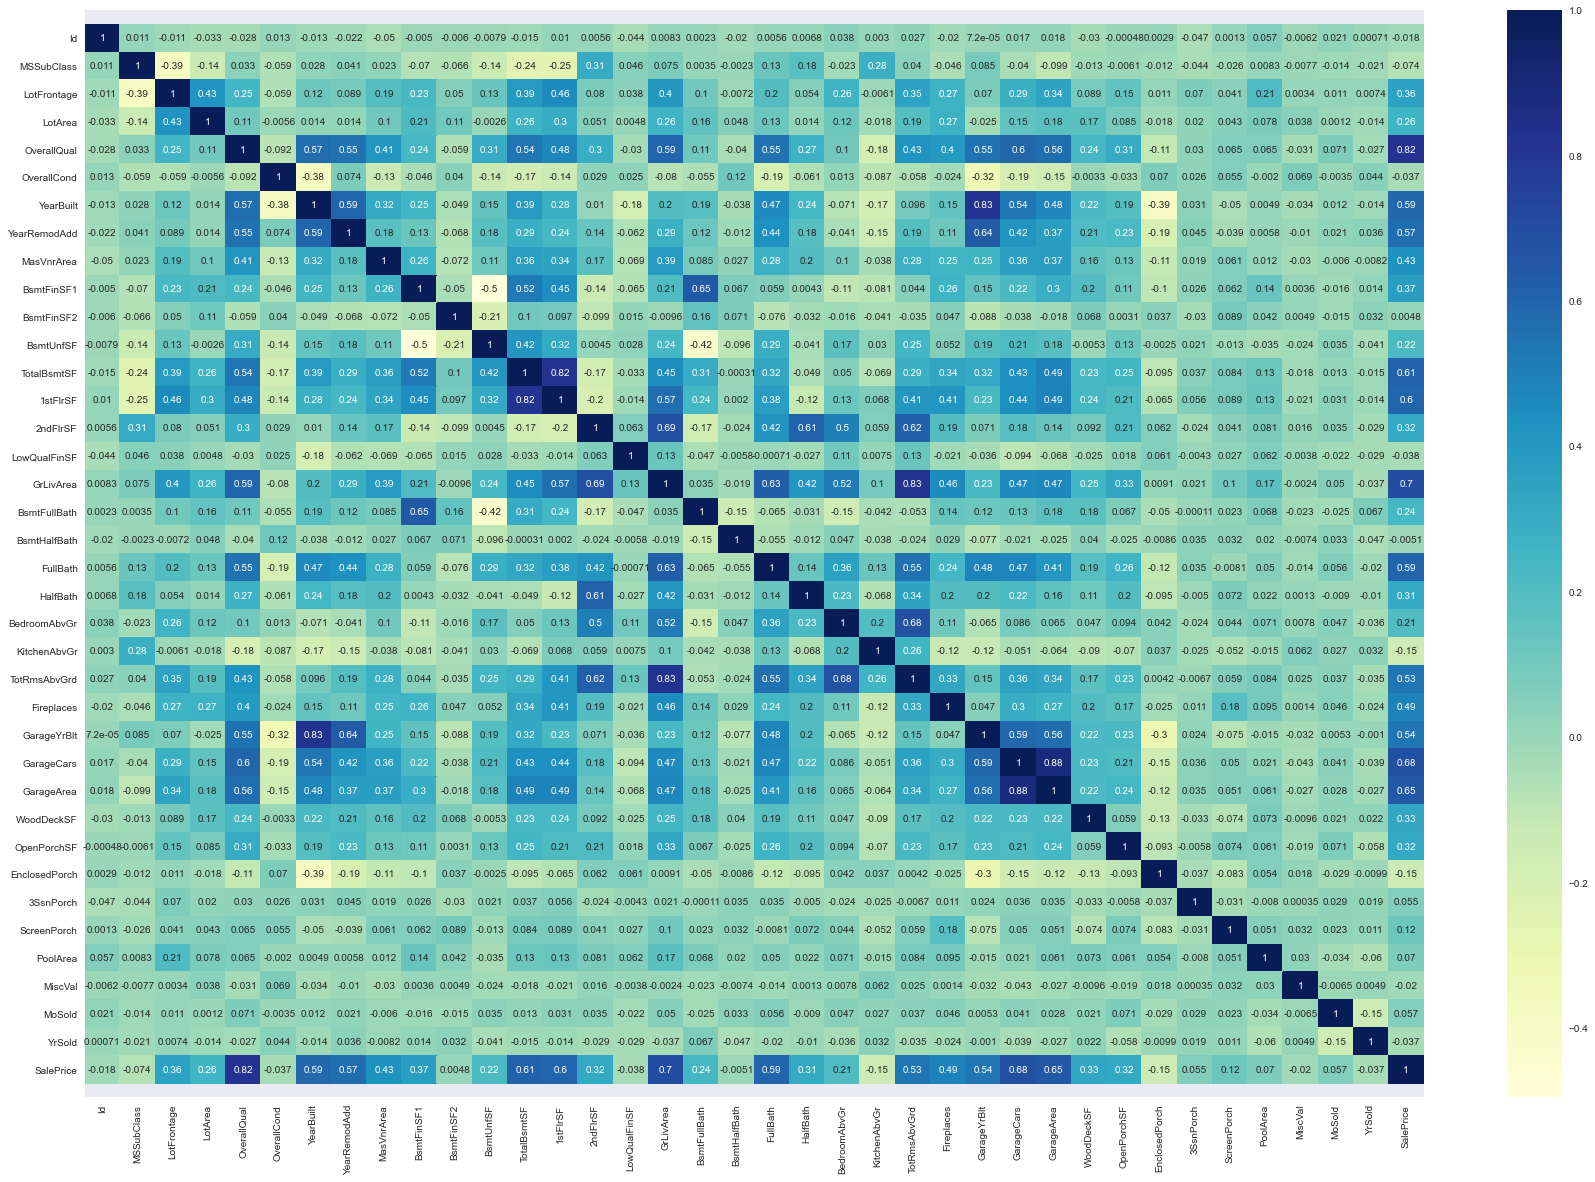

In [81]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df_train.corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

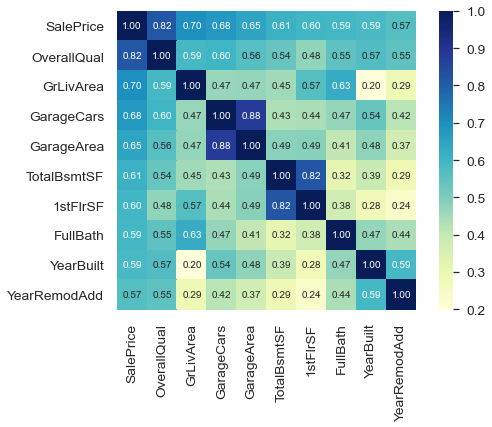

In [82]:
#number of variables for heatmap
cols = df_train.corr().nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [83]:
# SalePrice has highest corr with OverallQual
df_train.corr()[['SalePrice','OverallQual']].style.background_gradient(cmap='YlGnBu', axis=None)

,SalePrice,OverallQual
Id,-0.017942,-0.028365
MSSubClass,-0.073959,0.032628
LotFrontage,0.355879,0.251646
LotArea,0.257320,0.105806
OverallQual,0.817185,1.000000
OverallCond,-0.036868,-0.091932
YearBuilt,0.586570,0.572323
YearRemodAdd,0.565608,0.550684
MasVnrArea,0.430809,0.411876
BsmtFinSF1,0.372023,0.239666


### Scatter plot

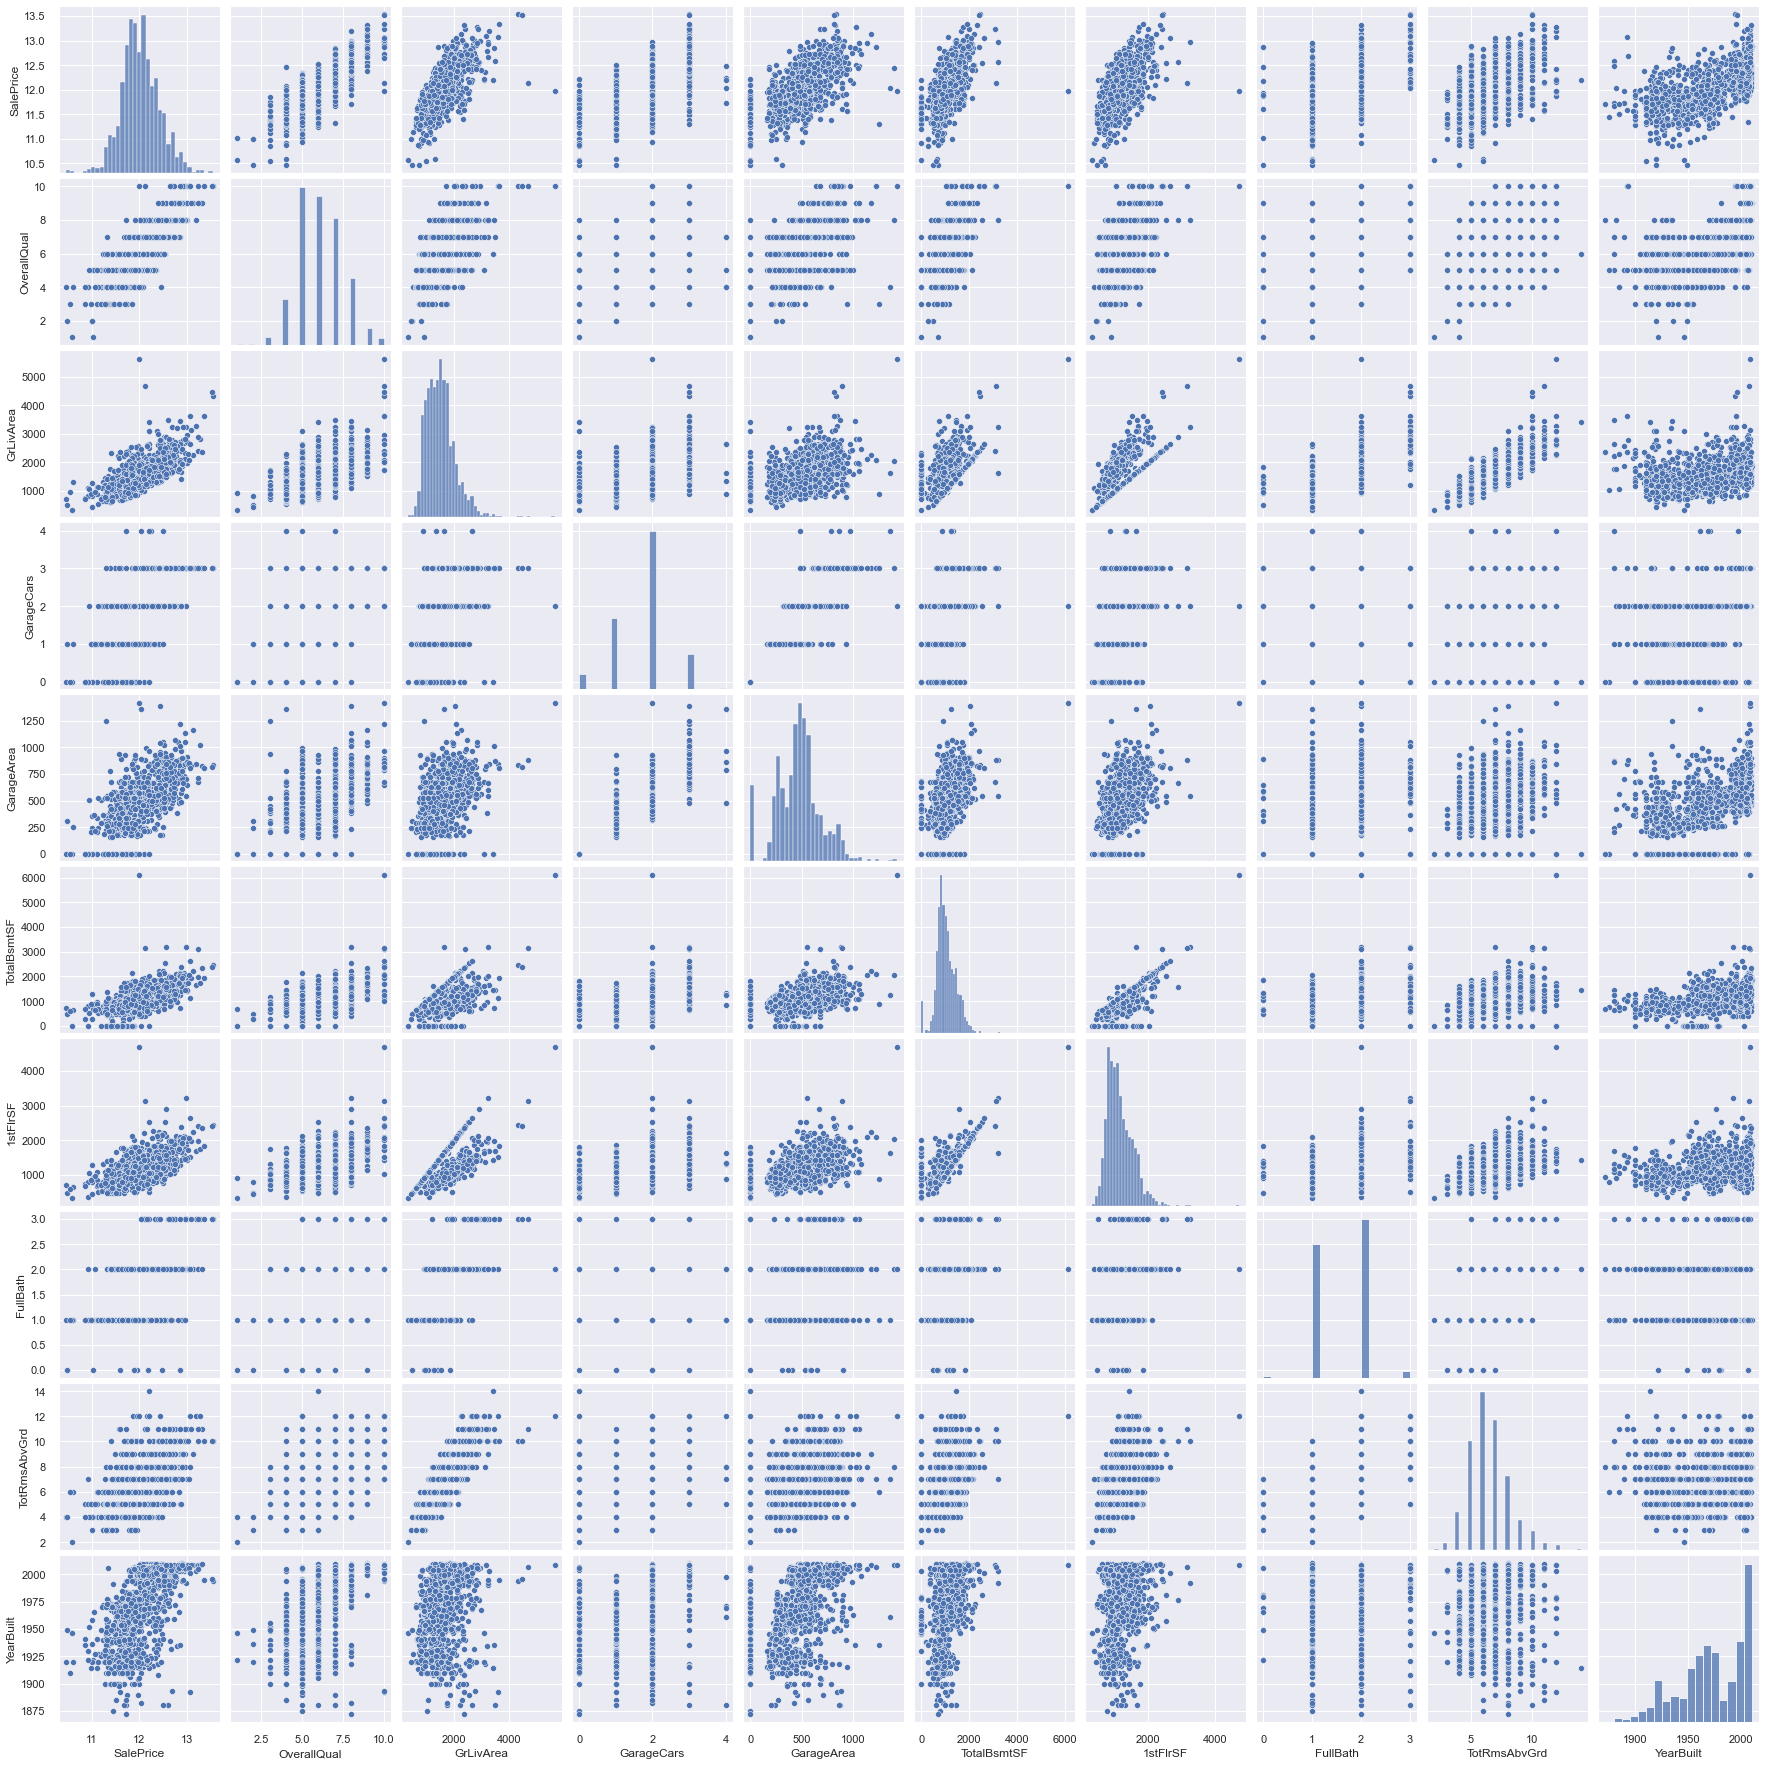

In [84]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

### Catplot

<function matplotlib.pyplot.show(close=None, block=None)>

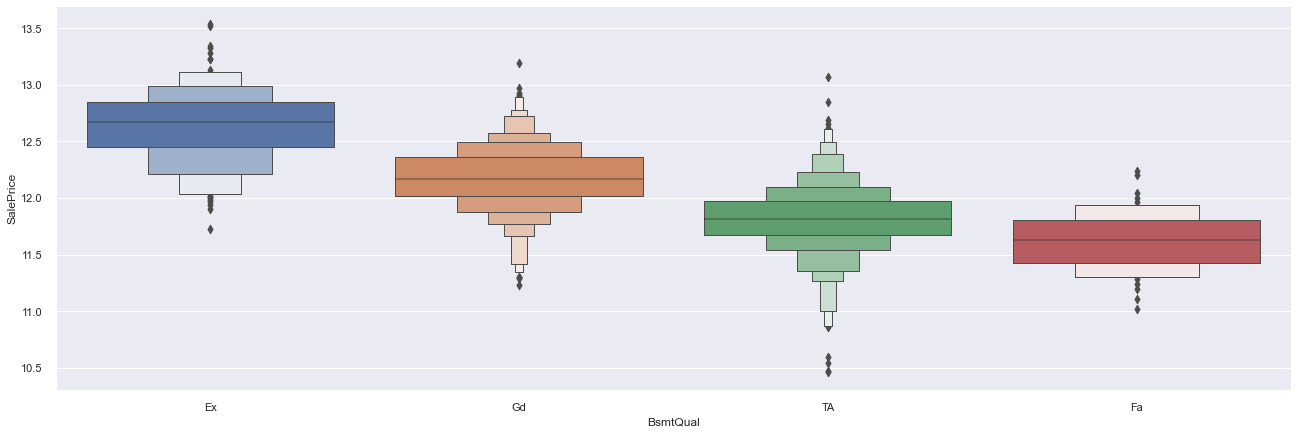

In [85]:
# Plot Location vs Price
sns.catplot(y='SalePrice',x='BsmtQual',data= df_train.sort_values('SalePrice',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

# Data Processing

## Duplicate Values

In [86]:
#check
duplicate = all_data[all_data.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


## Negative value

In [87]:
c = all_data.select_dtypes(exclude = ["object"]).columns

for a in range(len(c)):
    print("Is there any negative value in '{}' column  : {} ".format(c[a],(all_data[c[a]]<0).any()))

Is there any negative value in 'Id' column  : False 
Is there any negative value in 'MSSubClass' column  : False 
Is there any negative value in 'LotFrontage' column  : False 
Is there any negative value in 'LotArea' column  : False 
Is there any negative value in 'OverallQual' column  : False 
Is there any negative value in 'OverallCond' column  : False 
Is there any negative value in 'YearBuilt' column  : False 
Is there any negative value in 'YearRemodAdd' column  : False 
Is there any negative value in 'MasVnrArea' column  : False 
Is there any negative value in 'BsmtFinSF1' column  : False 
Is there any negative value in 'BsmtFinSF2' column  : False 
Is there any negative value in 'BsmtUnfSF' column  : False 
Is there any negative value in 'TotalBsmtSF' column  : False 
Is there any negative value in '1stFlrSF' column  : False 
Is there any negative value in '2ndFlrSF' column  : False 
Is there any negative value in 'LowQualFinSF' column  : False 
Is there any negative value in 'G

## Outliers

We will try to detect outliers for the numeric features and then remove them , But we will only remove those outliers which are a part of the train data i.e. having index within ntrain (defined earlier)

In [88]:
def plot_numeric_features(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=110)

    sns.distplot(all_data[feature], ax=ax1)
    sns.scatterplot(all_data[feature], all_data["SalePrice"], ax=ax2)
    sns.boxplot(all_data[feature], ax=ax3, orient='v', width=0.2)

    print("Skewness Coefficient of LotFrontage is %.2f" %all_data[feature].skew())
    ax1.set_yticks([])
    
    return plt

### LotFrontage Outlier Detection

Skewness Coefficient of LotFrontage is 1.68


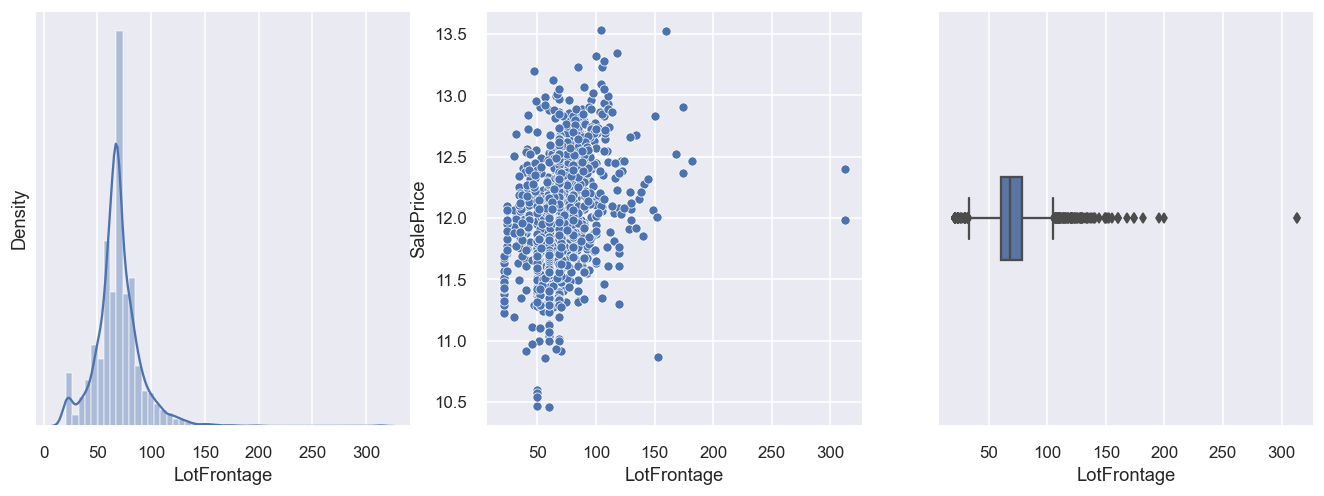

In [89]:
plot_numeric_features("LotFrontage").show()

In [90]:
drop_index = all_data['LotFrontage'][all_data['LotFrontage'] > 300].index

### BsmtFinSF1 Outlier Detection

Skewness Coefficient of LotFrontage is 1.43


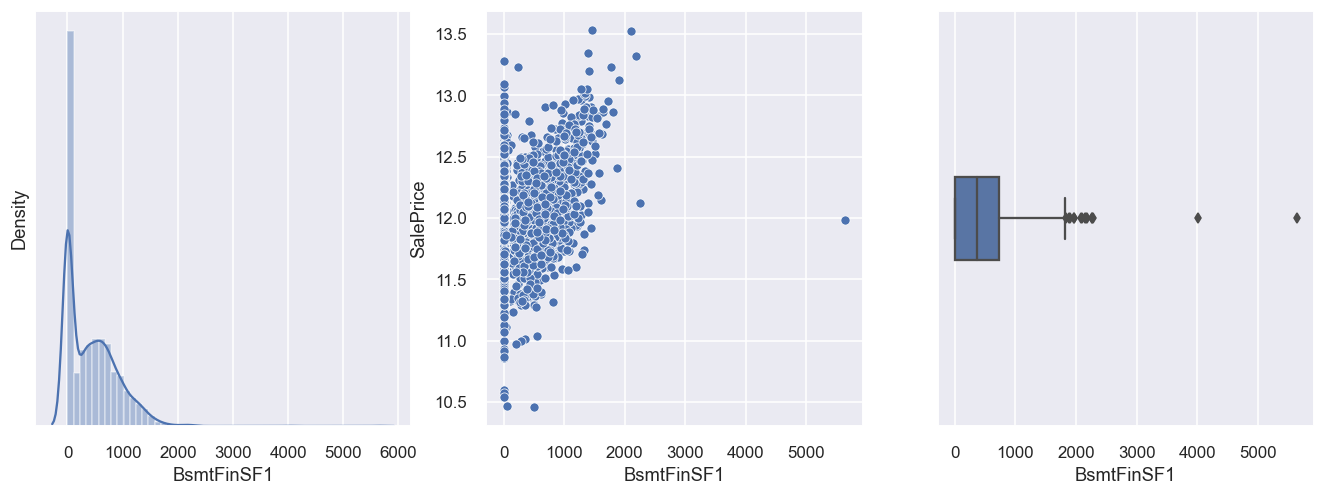

In [91]:
plot_numeric_features("BsmtFinSF1").show()

In [92]:
drop_index = np.append(drop_index, all_data['BsmtFinSF1'][all_data['BsmtFinSF1'] > 5000].index)

### GrLivArea Outlier Detection

Skewness Coefficient of LotFrontage is 1.27


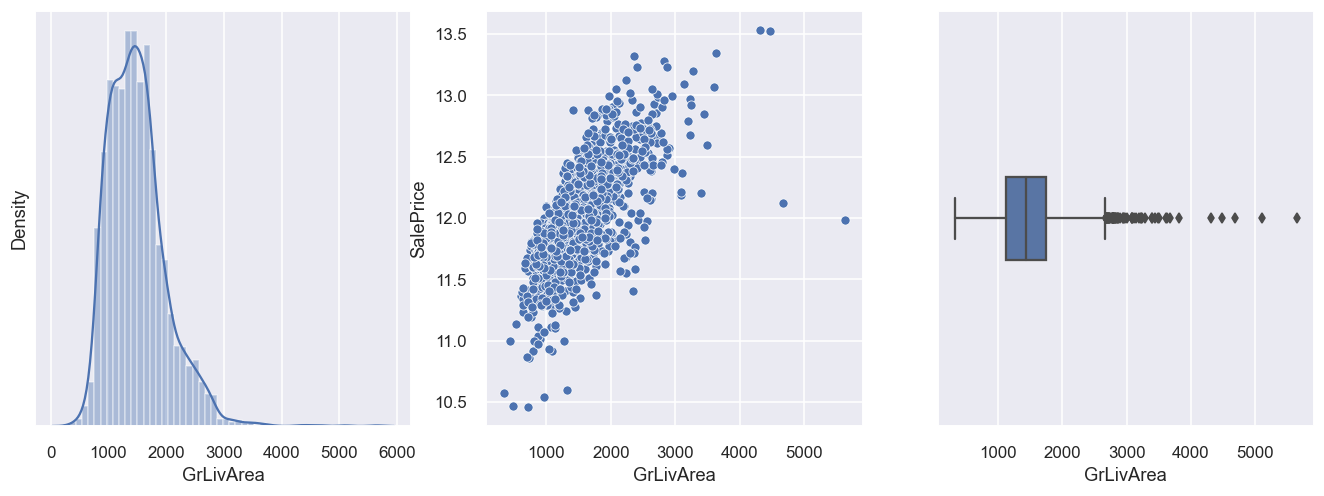

In [93]:
plot_numeric_features("GrLivArea").show()

In [94]:
drop_index = np.append(drop_index, all_data['GrLivArea'][
    (all_data['GrLivArea'] > 4000) & (all_data['SalePrice'] < 12.5)
].index)

### TotalBsmtSF Outlier Detection

Skewness Coefficient of LotFrontage is 1.16


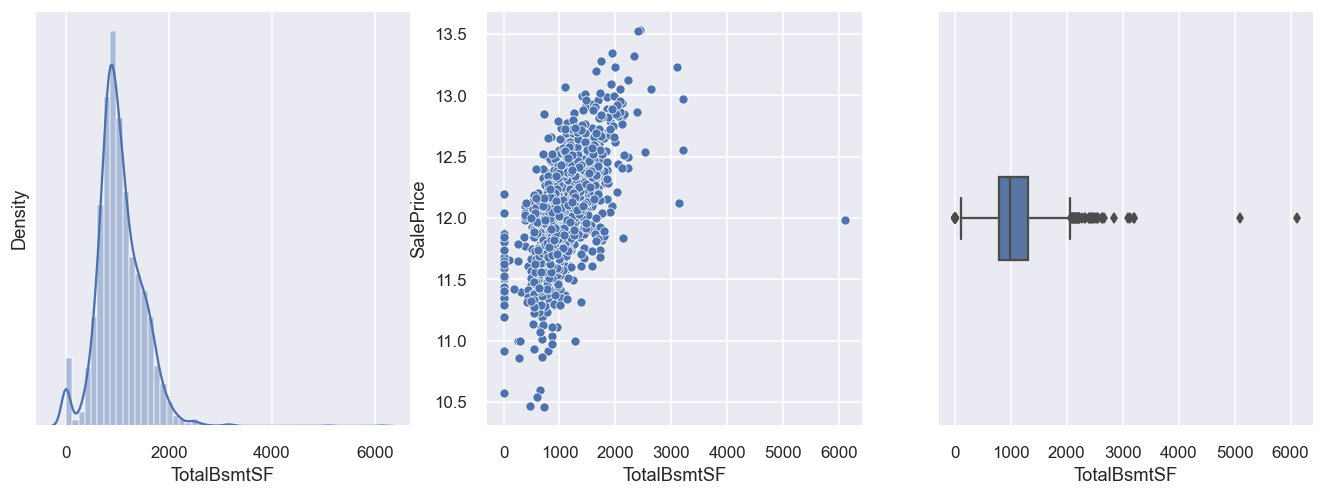

In [95]:
plot_numeric_features("TotalBsmtSF").show()

In [96]:
drop_index = np.append(drop_index, all_data['TotalBsmtSF'][all_data['TotalBsmtSF'] > 6000].index)

### 1stFlrSF Outlier Detection

Skewness Coefficient of LotFrontage is 1.47


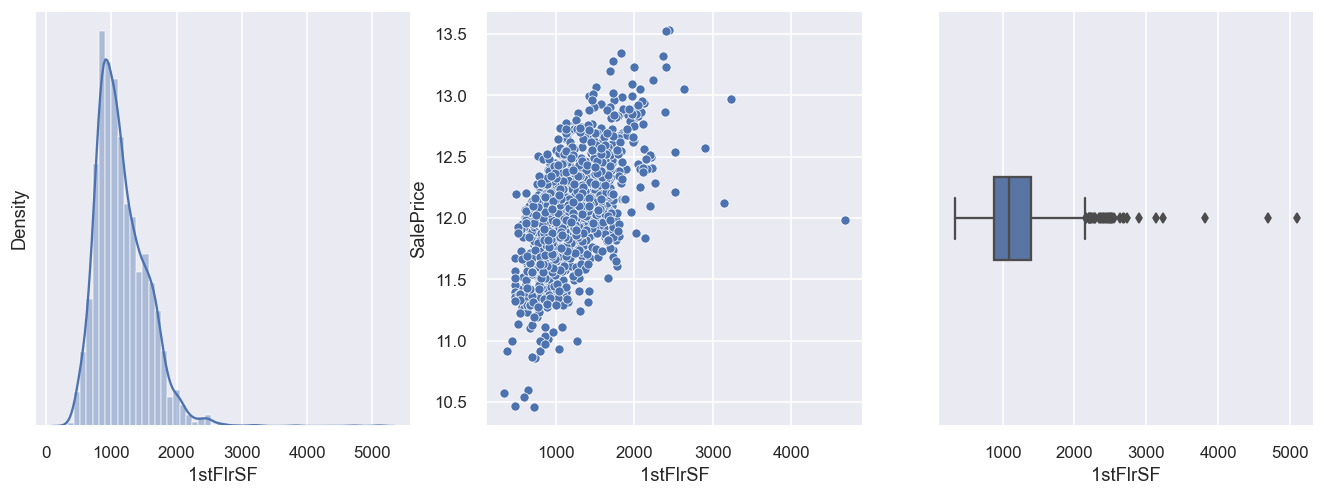

In [97]:
plot_numeric_features("1stFlrSF").show()

### LotArea Outlier Detection

Skewness Coefficient of LotFrontage is 12.83


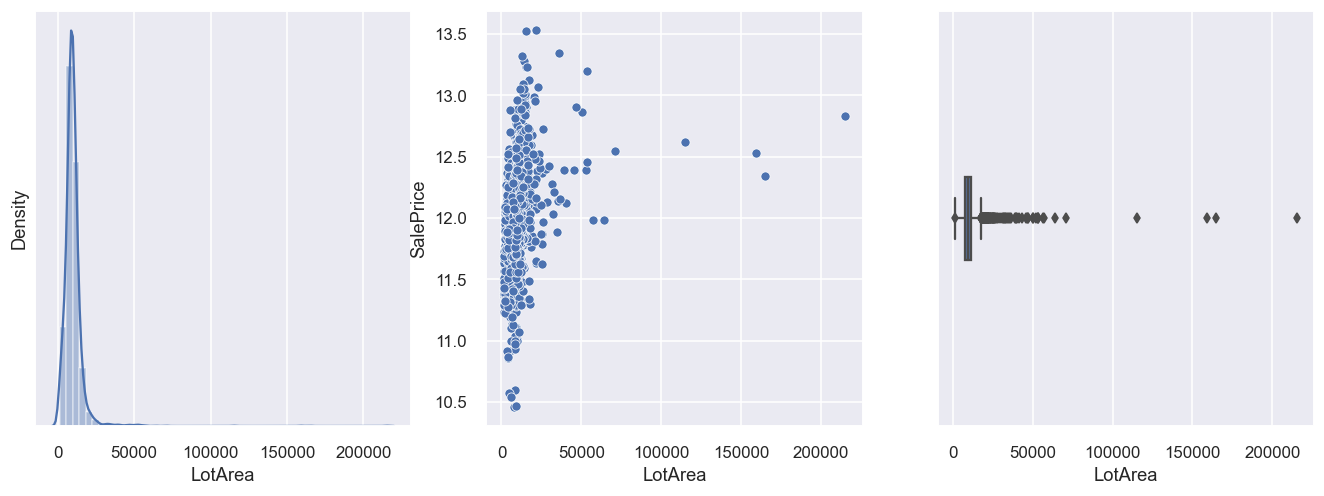

In [98]:
plot_numeric_features("LotArea").show()

In [99]:
drop_index = np.append(drop_index, all_data['LotArea'][all_data['LotArea'] > 100000].index)

### Making sure only remove data from the train set

In [100]:
drop_index = drop_index[drop_index < ntrain]

all_data = all_data.drop(drop_index).reset_index(drop=True)

## Length of indexes dropped
dropped_count = len(drop_index)

## Modify our ntrain variable
ntrain -= dropped_count

## Analyzing the scatter plots after outlier removal

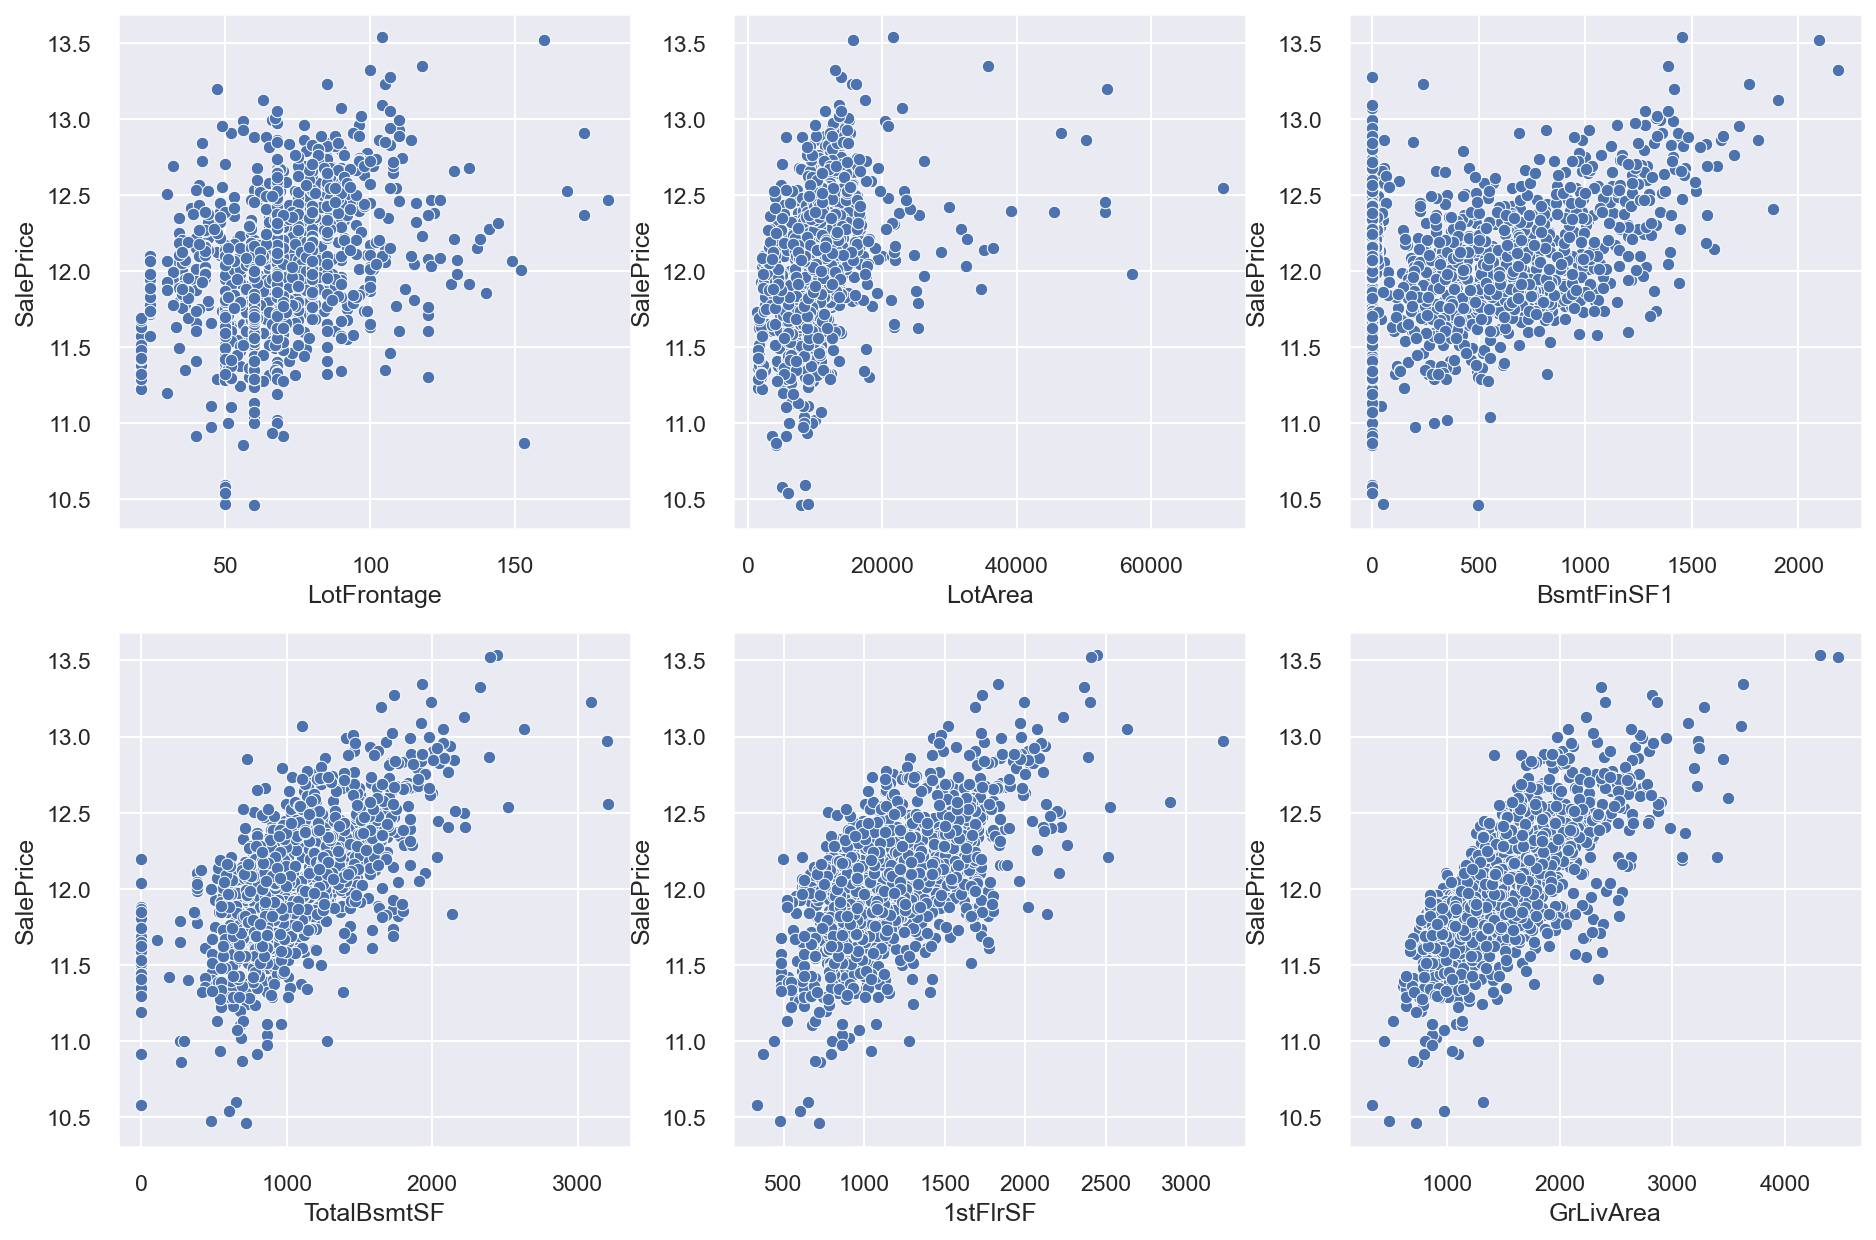

In [101]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10), dpi=150)

def create_scatter_plot(feature, axis):
    sns.scatterplot(all_data[feature], all_data["SalePrice"], ax=axis)
    
create_scatter_plot('LotFrontage', ax1)
create_scatter_plot('LotArea', ax2)
create_scatter_plot('BsmtFinSF1', ax3)
create_scatter_plot('TotalBsmtSF', ax4)
create_scatter_plot('1stFlrSF', ax5)
create_scatter_plot('GrLivArea', ax6)

plt.show()

## Label Encoding

For handling categorical data. We modtly use these 2 path:
 - OneHotEncoder
 - LabelEncoder
Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

### Garage Variable Label Encoding

##### GarageQual, GarageCond, and GarageFinish can be converted to ordinal variables.

In [102]:
quality_map = {
    "None": 0, "Po": 1,"Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}
all_data['GarageQual'].replace(quality_map, inplace=True)
all_data['GarageCond'].replace(quality_map, inplace=True)

In [103]:
quality_map = {
    "None": 0, "Unf": 1, "RFn": 2, "Fin": 3
}

all_data['GarageFinish'].replace(quality_map, inplace=True)

### Basement Variable Label Encoding

##### All the basement features can be converted in to ordinal variables.

In [104]:
quality_map = {
    "None": 0, "Po": 1,"Fa": 2, "TA": 3, "Gd": 4, "Ex": 5
}

all_data['BsmtCond'].replace(quality_map, inplace=True)
all_data['BsmtQual'].replace(quality_map, inplace=True)

In [105]:
quality_map = {
    "None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4
}

all_data['BsmtExposure'].replace(quality_map, inplace=True)

In [106]:
quality_map = {
    "None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6
}

all_data['BsmtFinType1'].replace(quality_map, inplace=True)

In [107]:
quality_map = {
    "None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6
}

all_data['BsmtFinType2'].replace(quality_map, inplace=True)

### KitchenQual Variable Label Encoding

In [108]:
quality_map = {
    "Po": 0,"Fa": 1, "TA": 2, "Gd": 3, "Ex": 4
}
all_data['KitchenQual'].replace(quality_map, inplace=True)

### Street Variable Label Encoding

In [109]:
all_data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [110]:
all_data['Street'].replace({'Grvl': 0, 'Pave': 1}, inplace=True)

### CentralAir Variable Label Encoding

In [111]:
all_data['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [112]:
all_data['CentralAir'].replace({'Y': 1, 'N': 0}, inplace=True)

### HeatingQC | ExterQual | ExterCond | LandSlope | LotShape Variable Label Encoding

##### All the above features refers to a quality mapping. Let us treat it as ordinal variable and perform Label Encoding.

In [113]:
''' HeatingQC | ExterQual | ExterCond'''
quality_map = {
    "Po": 0,"Fa": 1, "TA": 2, "Gd": 3, "Ex": 4
}
all_data.HeatingQC.replace(quality_map, inplace=True)
all_data.ExterQual.replace(quality_map, inplace=True)
all_data.ExterCond.replace(quality_map, inplace=True)

''' LandSlope '''
quality_map = { 'Sev': 0, 'Mod': 1, 'Gtl': 2 }
all_data.LandSlope.replace(quality_map, inplace=True)

''' LotShape '''
quality_map = { 'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3 }
all_data.LotShape.replace(quality_map, inplace=True)

### MSSubClass Variable Label Encoding

The values of the feature is int type but it actually defines some kind of class.

Lets treat this feature as a categorical one instead of numeric

In [114]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [115]:
class_map = {
    20:'Class1', 30:'Class2', 40:'Class3', 45:'Class4', 50:'Class5', 60:'Class6', 
    70:'Class7', 75:'Class8', 80:'Class9', 85:'Class10', 90:'Class11', 120:'Class12',
    150:'Class13', 160:'Class14', 180:'Class15', 190:'Class16'
}
all_data.MSSubClass.replace(class_map, inplace=True)

# Feature Engineering

## Adding 'TotalSF' Feature

Usually we rely more on the total area of the house rather than talking about individual areas. and then we try to create a new feature which sums up all the area parameters to give us the total area available in the house.

In [116]:
# Adding total sqfootage feature 
all_data['TotalSF'] =  all_data['GrLivArea'] + all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Adding 'AgeofHouse' and 'AgeRemod' Feature

The Year features do not provide much information. We can rather work on getting more concrete information like No. of Years ie Age instead of actual year.

### AgeofHouse

In [117]:
## Age of the house at the time of buying
all_data['AgeofHouse'] = all_data.YrSold - all_data.YearBuilt

In [118]:
all_data['AgeofHouse'].unique()

array([  5,  31,   7,  91,   8,  16,   3,  36,  77,  69,  43,   1,  46,
        48,  78,  40,  39,   4,  51,   6,  42,   2,  59,  49,  81,  88,
        15,  55,  57,  53,  41,  24,  33,  47,  89,  10,  72,  25,  52,
        44,   0,  87,  12,  65,  34,  11,  56,  95,  60,  99,  14,  94,
        13,  45,  97,  90,  30,  76, 122,  54,  62,  20,  37,  68,  50,
        71,   9,  38,  18,  58,  70,  32,  35,  83,  84,  66,  19,  22,
        86,  98, 114,  93,  75,  82,  17, 106,  29,  96,  27,  92, 128,
        61,  67,  21,  26, 108,  28,  63,  73,  74,  80, 115, 126, 102,
        85,  23, 110, 117, 129,  64, 100, 111, 104, 119, 127, 107, 135,
       109, 136, 103,  79, 125, 120, 118, 113, 112,  -1, 101], dtype=int64)

There is one negative value (-1) in all_data['AgeofHouse'] which indicates that the Customer bought the house a year before it was built. We can confirm the same with the following code.

In [119]:
# replace this value with 0 to avoid negative values.
all_data.AgeofHouse = all_data.AgeofHouse.map(lambda x: 0 if x < 0 else x)

### AgeofRemodeled

In [120]:
## No. of years since the house was remodeled at the time of buying
all_data['AgeofRemodeled'] = all_data.YrSold - all_data.YearRemodAdd

In [121]:
all_data['AgeofRemodeled'].unique()

array([ 5, 31,  6, 36,  8, 14,  2, 58, 43,  0, 46, 48, 40, 39,  4, 44, 57,
        9, 10,  1, 51, 19,  3, 53, 41, 24, 28, 47, 56, 52, 11, 60, 21, 34,
        7, 42, 13, 27, 12, 45, 16, 25, 30, 33, 54, 20, 37, 50, 15, 38, 17,
       32, 35, 22, 18, 59, 29, 49, 26, 55, 23, -1, -2], dtype=int64)

There are two negative value (-1, -2) in all_data['AgeofRemodeled'] which indicates that the Customer has done the renovation after buying the house. We can confirm the same with the following code.

In [122]:
# replace this value with 0 to avoid negative values
all_data.AgeofRemodeled  =  all_data.AgeofRemodeled.map(lambda x: 0 if x < 0 else x)

## Log Transforming all the Highly Skewed Features.

In [123]:
## Get all the numeric features in out dataset
numeric_features = all_data.skew().index

## Getting all the skewed features (skew > 0.5 or skew < -0.5)
skewed_features = all_data[numeric_features].skew()[np.abs(all_data[numeric_features].skew()) > 0.5].index

## Performing log(1+x) transformation
all_data[skewed_features] = np.log1p(all_data[skewed_features])

## Skewed Features

In [124]:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

### Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of <b>1+x</b>.
Note that setting <b>λ=0</b> is equivalent to log1p used above for the target variable.
See [this page](http://onlinestatbook.com/2/transformations/box-cox.html) for more details on Box Cox Transformation as well as page [the scipy function's](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)

In [125]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     all_data[feat] = boxcox1p(all_data[feat], lam)
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])

## Getting dummy categorical features

In [126]:
## Get all the categorical columns
cat_cols = all_data.select_dtypes("object").columns

## One-Hot Encoding all the categorical variables but dropping one of the features among them.
drop_categ = []
for i in cat_cols:
    drop_categ += [ i+'_'+str(all_data[i].unique()[-1]) ]

## Create dummy variables (One-Hot Encoding)
all_data = pd.get_dummies(all_data, columns=cat_cols) 

## Drop the last column generated from each categorical feature
all_data.drop(drop_categ, axis=1, inplace=True)

## Getting the new train and test sets

In [127]:
X_train =  all_data[:-ntest].drop(['SalePrice'], axis=1)
y_train =  all_data[:-ntest]['SalePrice']
X_test  =  all_data[-ntest:].drop(['SalePrice'], axis=1)

# Modeling

In [128]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from lightgbm import LGBMRegressor

In [129]:
## Remove SalePrice from numeric_features to avoid scaling it
numeric_features = numeric_features.drop('SalePrice')

## Scaling all the numeric features using Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features]  = scaler.transform(X_test[numeric_features])

In [130]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
df_imp = pd.DataFrame(xgb.feature_importances_ , columns = ['Importance'], index=X_train.columns)
df_imp = df_imp.sort_values(['Importance'], ascending = False)

df_imp.head()

,Importance
TotalSF,0.099384
FireplaceQu,0.095092
OverallQual,0.094584
MSZoning_C (all),0.083112
AgeofHouse,0.074483


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## LinearRegression

In [132]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Traing set   : ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set  : ",linear_reg.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9463119127823949
Accuracy on Testing set  :  0.9043727423092306
__________________________________________
		Error Table
Mean Absolute Error      :  0.08223848936165257
Mean Squared Error       :  0.01442900520237386
Root Mean Squared Error  :  0.1201207942130498
R Squared Error          :  0.9043727423092306


## Random Forest

In [133]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred= RandomForest.predict(X_test)

print("Accuracy on Traing set   : ",RandomForest.score(X_train,y_train))
print("Accuracy on Testing set  : ",RandomForest.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9833641935218814
Accuracy on Testing set  :  0.8915980383176494
__________________________________________
		Error Table
Mean Absolute Error      :  0.08797891514861296
Mean Squared Error       :  0.01635655467732972
Root Mean Squared Error  :  0.12789274677373114
R Squared Error          :  0.8915980383176494


## LGBM

In [134]:
lgb_model = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb_model.fit(X_train, y_train)
y_pred= lgb_model.predict(X_test)

print("Accuracy on Traing set   : ",lgb_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",lgb_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Accuracy on Traing set   :  0.9708517811508043
Accuracy on Testing set  :  0.9149712751022145
__________________________________________
		Error Table
Mean Absolute Error      :  0.07907687020995503
Mean Squared  Error      :  0.012829813836853221
Root Mean Squared Error  :  0.11326876814397348
R Squared Error          :  0.9149712751022145


## XGBoost

In [135]:
XGB_model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

XGB_model.fit(X_train, y_train)
y_pred= XGB_model.predict(X_test)

print("Accuracy on Traing set   : ",XGB_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",XGB_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

[16:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy on Traing set   :  0.9609192373794363
Accuracy on Testing set  :  0.9249491836676962
__________________________________________
		Error Table
Mean Absolute Error      :  0.07456670734277188
Mean Squared  Error      :  0.011324267216812038
Root Mean Squared Error  :  0.106415540297515
R Squared Error          :  0.9249491836676962
